In [13]:
import os
import h5py
import json
# import keras
import random 
import imageio
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import tree
# from keras import backend as K
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [14]:
Data = pd.read_csv('DsDnsPrScTch.csv') 

c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
Data["Teacher First Project Posted Date"]=pd.to_datetime(Data["Teacher First Project Posted Date"])
Data["Project Fully Funded Date"]=pd.to_datetime(Data["Project Fully Funded Date"])
Data["Project Expiration Date"]=pd.to_datetime(Data["Project Expiration Date"])
Data["Project Posted Date"]=pd.to_datetime(Data["Project Posted Date"])
Data["Donation Received Date"]=pd.to_datetime(Data["Donation Received Date"])
Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]

In [16]:
Data.describe()

Unnamed: 0  Donation Amount  Donor Cart Sequence  Unnamed: 0.1  \
count  4.608080e+06     4.608080e+06         4.608080e+06  4.608080e+06   
mean   2.304040e+06     6.103025e+01         1.434411e+02  5.180152e+05   
std    1.330238e+06     1.670434e+02         8.768125e+02  3.155913e+05   
min    0.000000e+00     1.000000e-02         1.000000e+00  0.000000e+00   
25%    1.152020e+06     1.500000e+01         1.000000e+00  2.412430e+05   
50%    2.304040e+06     2.500000e+01         2.000000e+00  5.119320e+05   
75%    3.456059e+06     5.000000e+01         1.100000e+01  7.913402e+05   
max    4.608079e+06     6.000000e+04         1.811600e+04  1.110016e+06   

       Teacher Project Posted Sequence  Project Cost  \
count                     4.608080e+06  4.608080e+06   
mean                      1.204972e+01  9.230227e+02   
std                       2.965796e+01  3.484539e+03   
min                       1.000000e+00  3.529000e+01   
25%                       1.000000e+00  3.741100e+02   
50%                       3.000000e+00  5.555800e+02   
75%                       8.000000e+00  9.400725e+02   
max                       4.970000e+02  2.557377e+05   

       Project Short Description_polarity  \
count                        4.608080e+06   
mean                         2.115292e-01   
std                          2.023153e-01   
min                         -1.000000e+00   
25%                          7.000000e-02   
50%                          2.069444e-01   
75%                          3.400000e-01   
max                          1.000000e+00   

       Project Short Description_subjectivity  Project Essay_polarity  \
count                            4.608080e+06            4.608080e+06   
mean                             4.794080e-01            2.170470e-01   
std                              2.042608e-01            7.996678e-02   
min                              0.000000e+00           -3.243457e-01   
25%                              3.583333e-01            1.634127e-01   
50%                              4.958333e-01            2.153491e-01   
75%                              6.047619e-01            2.688095e-01   
max                              1.000000e+00            7.333333e-01   

       Project Essay_subjectivity  Project Need Statement_polarity  \
count                4.608080e+06                     4.608080e+06   
mean                 4.898541e-01                     1.124708e-01   
std                  7.377606e-02                     2.180928e-01   
min                  0.000000e+00                    -1.000000e+00   
25%                  4.420353e-01                     0.000000e+00   
50%                  4.904762e-01                     0.000000e+00   
75%                  5.385314e-01                     2.208333e-01   
max                  8.678571e-01                     1.000000e+00   

       Project Need Statement_subjectivity  School Percentage Free Lunch  \
count                         4.608080e+06                  4.586186e+06   
mean                          2.894306e-01                  6.444936e+01   
std                           2.836419e-01                  2.518006e+01   
min                           0.000000e+00                  0.000000e+00   
25%                           0.000000e+00                  4.700000e+01   
50%                           2.833333e-01                  7.000000e+01   
75%                           5.000000e-01                  8.600000e+01   
max                           1.000000e+00                  1.000000e+02   

         School Zip Number of dates since posted  
count  4.608080e+06                      4608080  
mean   5.148995e+04   24 days 01:06:22.770692351  
std    3.062869e+04   32 days 05:36:26.791790207  
min    7.050000e+02          -254 days +17:51:25  
25%    2.761000e+04       2 days 11:16:17.750000  
50%    4.821000e+04              7 days 19:01:50  
75%    8.021100e+04             33 days 09:25:40  
max    9.995000e+04            366 days 

In [17]:
Data.dtypes

Unnamed: 0                                          int64
Project ID                                         object
Donation ID                                        object
Donor ID                                           object
Donation Included Optional Donation                object
Donation Amount                                   float64
Donor Cart Sequence                                 int64
Donation Received Date                     datetime64[ns]
Donor City                                         object
Donor State                                        object
Donor Is Teacher                                   object
Donor Zip                                          object
Unnamed: 0.1                                        int64
School ID                                          object
Teacher ID                                         object
Teacher Project Posted Sequence                     int64
Project Type                                       object
Project Title 

c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    743945.000000
mean          0.462287
std           0.332363
min           0.000030
25%           0.138487
50%           0.480108
75%           0.742170
max           2.550013
Name: Raised funds to project cost ratio, dtype: float64


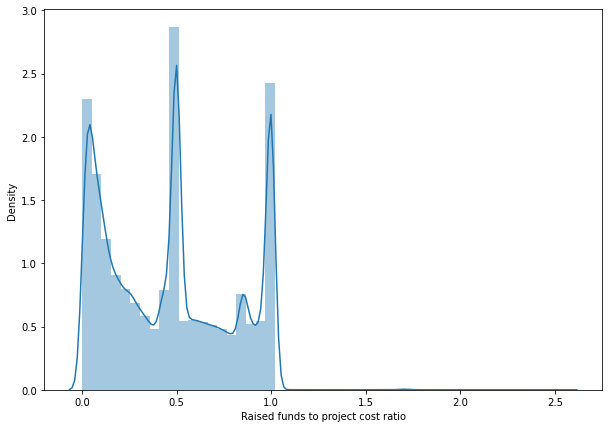

In [18]:
T=pd.Timedelta('30 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())


c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    870802.000000
mean          0.555950
std           0.337268
min           0.000026
25%           0.255094
50%           0.500019
75%           0.889879
max           2.550013
Name: Raised funds to project cost ratio, dtype: float64


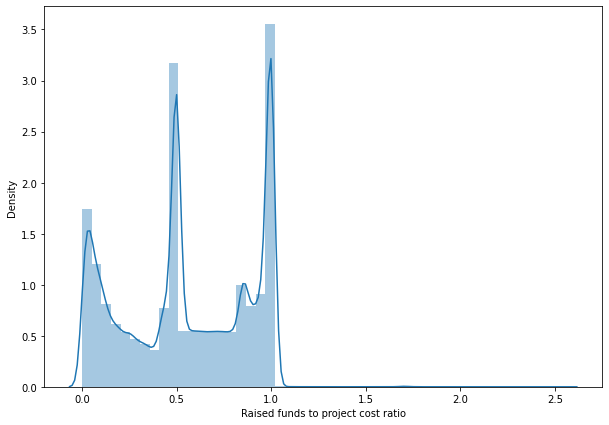

In [19]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G120=Grouped_data_Final

In [20]:
#===============================================================================================
#                                  Model Training Funstion
#===============================================================================================

def Train_Model(Classifier, Model_variables_con,Model_variables_cat,Data,
                Time_period_indays=30,K=100,Fund_Ratio_treshold=0.142):
    # Time_period should be in days 
    # K is the Top-K value

    #=================================== Initiate the List Variables ================================
    
    Time_points = []
    Output=dict()
    Output["Overall_Training_Accuracy"], Output["Overall_Training_Precision"], Output["Overall_Training_Recall"] = list(),list(),list()
    Output["Overall_Testing_Accuracy"], Output["Overall_Testing_Precision"], Output["Overall_Testing_Recall"] = list(),list(),list()
    Output["Top_K_Accuracy"], Output["Top_K_Precision"], Output["Top_K_Recall"] = list(),list(),list()
    Output["Data_size_Testing"]=list()
    Output["Ones_Testing"]=list()
    Output["TP_Testing"] = list()
    #=================================== Initiate the Columns ======================================
    
    print("Initiatnig the Columns")
    Main_Variables = list(set(["Project ID","Project Posted Date","Project Expiration Date","Donation Received Date",
         "Project Cost","Donation Amount","Number of dates since posted"]+Model_variables_cat+Model_variables_con))
    Model_variables = Model_variables_con.copy()
    print("Variables considered in model training")
    for i in sub_var: print(">",i,i in Data.columns) # print all variables considered.
    print()
    Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]
    sub_Data = Data.loc[:,Main_Variables]
    

    #================================= One-Hot-Encoding Columns to remove ==========================
    
    print("One-Hot-Encoding removing columns identification")
    Sub_Variables_to_remove=dict()
    for i in Model_variables_cat:
        sub_variables = Data[i].unique()
        Model_variables+=sorted([i+"_"+str(j) for j in Data[i].unique()])
        Model_variables.remove(i+"_"+str(sub_variables[0]))
        Sub_Variables_to_remove[i]=sub_variables[0]
        
    
    #=================================== Initiate Time Variables ====================================
    
    print("Initiate Time Variables")
    MaxT = pd.Timestamp("2018-05-01 00:00:00")  #max(Data["Project Posted Date"])
    MinT = pd.Timestamp("2013-01-01 00:00:00")  #min(Data["Project Posted Date"])
    Time_period = timedelta(days=Time_period_indays)  
    T_current = MinT- Time_period +timedelta(days=120) 
    sub_Data["Number of dates since posted"] = sub_Data["Number of dates since posted"]/ np.timedelta64(1, 'D')
    
    
    #=================================== Loop over time frams =======================================
    
    print("Time iteration is starting\n")
    while (T_current<MaxT-Time_period):
        
        T_current = T_current+ Time_period
        Time_points+=[T_current]
        T_Train_start = T_current-timedelta(days=120)  # Start of the data frame
        T_Train_end = T_current-Time_period  #End of the data frame
        print("As of Date:",T_current,"\n"+"="*85)
        
    #====================================== Extract the frams ======================================= 
    
        # Extracts projects posted before the Current(As of) date
        Data_in_TimeWindow = sub_Data[sub_Data["Project Posted Date"] < pd.to_datetime(T_current)]  
        
        # Extracts projects posted after the start date of the Time window
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] > pd.to_datetime(T_Train_start)]
        
        #Time period to be consided for the donations since posted (30days, as default)
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Number of dates since posted"]< Time_period_indays]
        
        #Express the donation amount as a ratio of to the Project cost
        Data_in_TimeWindow["Fund_Ratio"]=Data_in_TimeWindow["Donation Amount"]/Data_in_TimeWindow["Project Cost"]
        
        
    #=========================== Do One-Hot_Encoding for Categorical Variables ======================
    
        for var in Model_variables_cat:
            Sub_Dummied_Data=pd.get_dummies(Data_in_TimeWindow[var])  #create dummpy variables with one hot encoding 
            Sub_Dummied_Data_columns=sorted(Sub_Dummied_Data.columns)  #extract the column names of dummpy variables
            Sub_Dummied_Data_columns.remove(Sub_Variables_to_remove[var]) #remove a pre defined column from dummpy variables
            Data_in_TimeWindow=Data_in_TimeWindow.drop([var], axis=1) #remove main variable from the dataset
            #copy the columns to the main data set 
            for col in Sub_Dummied_Data_columns : Data_in_TimeWindow[var+"_"+col] = Sub_Dummied_Data[col]
                
        #Add the columns which have not been one-hot-encoded
        for i in Model_variables:
            if i not in Data_in_TimeWindow.columns:  Data_in_TimeWindow[i]=0
    
    
    #============================================ Imputing ==========================================
        Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)
                
    
    #=================================== Training set Creation =====================================
    
        #extract the training set from the timewindow
        Train_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] < pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Train_Data_CR=Train_Data.groupby(["Project ID"]).sum() 
        Train_Data_Final=Train_Data.groupby(["Project ID"]).max()
        Train_Data_Final["Fund_Ratio"]=Train_Data_CR["Fund_Ratio"]
        Train_Data_Final["Donation Amount"]=Train_Data_CR["Donation Amount"]
        
        # Define Fund_Ratio_Treshold
        Fund_Ratio_Treshold = Fund_Ratio_treshold
        Fund_Ratio_Treshold = Train_Data_Final["Fund_Ratio"].median()
        
        # Genarate the Label for the dataset 
        Train_Data_Final['Label'] = Train_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                           Fund_Ratio_Treshold  else 0, axis=1)
        
        X_train = Train_Data_Final.loc[:,Model_variables]
        Y_train = np.array(Train_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #==================================== Testing set Creation =====================================
    
        #extract the training set from the timewindow
        Test_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] >= pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Test_Data_CR=Test_Data.groupby(["Project ID"]).sum() 
        Test_Data_Final=Test_Data.groupby(["Project ID"]).max()
        Test_Data_Final["Fund_Ratio"]=Test_Data_CR["Fund_Ratio"]
        Test_Data_Final["Donation Amount"]=Test_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Test_Data_Final['Label'] = Test_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                         Fund_Ratio_Treshold  else 0, axis=1)
        X_test = Test_Data_Final.loc[:,Model_variables]
        Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #===================================== Model Training =========================================
    
        Classifier.fit(X_train, Y_train)
        
        # Predict on training 
        Train_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_train)[:,1]
        Train_Data_Final["Y_pred"]= Classifier.predict(X_train)
        # Predict on testing 
        Test_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_test)[:,1]
        Test_Data_Final["Y_pred"] = Classifier.predict(X_test)

        
    #====================================== Evaluation Trainign  ============================================
    
        Training_CM= confusion_matrix(Y_train,Train_Data_Final["Y_pred"])
        Training_TN, Training_FP ,Training_FN, Training_TP =  Training_CM.ravel()
        
        Training_Accuracy=(Training_TP+Training_TN)/(Training_TN+ Training_FP +Training_FN+ Training_TP)
        Training_Precision=Training_TP/(Training_TP+Training_FP)
        Training_Recall=Training_TP/(Training_TP+Training_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Training_Accuracy)
        print("\tTraining_TP:",Training_TP,"\tTraining_FP:",Training_FP,
              "\n\tTraining_TN:",Training_TN,"\tTraining_FN:",Training_FN ,end="\n"*2)
        
        
    #====================================== Evaluation Testign  ============================================   
    
        Testing_CM= confusion_matrix(Y_test,Test_Data_Final["Y_pred"])
        Testing_TN, Testing_FP ,Testing_FN, Testing_TP =  Testing_CM.ravel()
        
        Testing_Accuracy=(Testing_TP+Testing_TN)/(Testing_TN+ Testing_FP +Testing_FN+ Testing_TP)
        Testing_Precision=Testing_TP/(Testing_TP+Testing_FP)
        Testing_Recall=Testing_TP/(Testing_TP+Testing_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Accuracy)
        print("\tTesting_TP:",Testing_TP,"\tTesting_FP:",Testing_FP,
              "\n\tTesting_TN:",Testing_TN,"\tTesting_FN:",Testing_FN ,end="\n"*2)
        
    #====================================== Evaluation Top K  ============================================        
        
        Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False,ignore_index=True)
        Test_Data_Final["Y_pred"]=0
        for index_i in range(K): Test_Data_Final.loc[index_i,"Y_pred"]=1
        Top_K=Test_Data_Final
        
        Y_test_Top_K =  Top_K.loc[:,["Label"]] 
        Y_pred_Top_K =  Top_K.loc[:,["Y_pred"]]
        
        Testing_Top_K_CM= confusion_matrix(Y_test_Top_K,Y_pred_Top_K)
        if len(Testing_Top_K_CM.ravel())==4:
            Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP =  Testing_Top_K_CM.ravel()
        else:
            Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP=0,0,0,K
        
        Testing_Top_K_Accuracy=(Testing_Top_K_TP+Testing_Top_K_TN)/(Testing_Top_K_TN
                                                                        + Testing_Top_K_FP +Testing_Top_K_FN+ Testing_Top_K_TP)
        Testing_Top_K_Precision=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FP)
        Testing_Top_K_Recall=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Top_K_Accuracy)
        print("\tTesting_Top_K_TP:",Testing_Top_K_TP,"\tTesting_Top_K_FP:",Testing_Top_K_FP,
              "\n\tTesting_Top_K_TN:",Testing_Top_K_TN,"\tTesting_Top_K_FN:",Testing_Top_K_FN ,end="\n"*2)
        
     #====================================== save computed values  ============================================       
        Output["Overall_Training_Accuracy"] += [Training_Accuracy]
        Output["Overall_Training_Precision"] += [Training_Precision]
        Output["Overall_Training_Recall"] += [Training_Recall ]
        
        Output["Overall_Testing_Accuracy"] += [Testing_Accuracy]
        Output["Overall_Testing_Precision"] += [Testing_Precision]
        Output["Overall_Testing_Recall"] += [Testing_Recall]
        
        Output["Top_K_Accuracy"] += [Testing_Top_K_Accuracy] 
        Output["Top_K_Precision"] += [Testing_Top_K_Precision]  
        Output["Top_K_Recall"] += [Testing_Top_K_Recall] 
        
        Output["Data_size_Testing"]+= [Testing_TN+ Testing_FP +Testing_FN+ Testing_TP]
        Output["Ones_Testing"]+=[ Testing_FN+ Testing_TP]
        Output["TP_Testing"]+=[ Testing_TP]
    
    Output["Classifier"]=Classifier
    Output["Model_variables"]=Model_variables
    Output["Time_points"]=Time_points
    return Output,Test_Data_Final,Train_Data_Final
        

In [21]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler


clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=18,min_samples_split=20)

Model_variables_con= ["Project Cost","Number of dates since posted","School Percentage Free Lunch","Project Cost",
                      "Project Short Description_polarity","Project Short Description_subjectivity",
                      "Project Essay_polarity","Project Essay_subjectivity","Project Need Statement_polarity",
                      "Project Need Statement_subjectivity"]
Model_variables_cat= ["School Metro Type","Teacher Prefix","Project Grade Level Category"]
Output,Test_Data_Final,Train_Data_Final= Train_Model(clf, Model_variables_con,Model_variables_cat,
                                    Data,Time_period_indays=30,K=400,Fund_Ratio_treshold=0.03)

Initiatnig the Columns
Variables considered in model training
> Number of dates since posted True
> Project ID True
> Donation Amount True
> Project Cost True
> Project Posted Date True
> Project Expiration Date True
> Donation Received Date True

One-Hot-Encoding removing columns identification
Initiate Time Variables
Time iteration is starting

As of Date: 2013-05-01 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6879013614179296
	Training_TP: 5106 	Training_FP: 2180 
	Training_TN: 5606 	Training_FN: 2680

DecisionTreeClassifier  Testing Accuracy =  0.6035488575595528
	Testing_TP: 1071 	Testing_FP: 790 
	Testing_TN: 1412 	Testing_FN: 841

DecisionTreeClassifier  Testing Accuracy =  0.5483714146815751
	Testing_Top_K_TP: 227 	Testing_Top_K_FP: 173 
	Testing_Top_K_TN: 2029 	Testing_Top_K_FN: 1685

As of Date: 2013-05-31 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6897721106890938
	Training_TP: 5325 	Training_FP: 2527 
	Training_TN: 4845 	Training_FN: 2047

DecisionTreeClassifier  Testing Accuracy =  0.5850986121256392
	Testing_TP: 1295 	Testing_FP: 872 
	Testing_TN: 1108 	Testing_FN: 832

DecisionTreeClassifier  Testing Accuracy =  0.5010956902848794
	Testing_Top_K_TP: 239 	Testing_Top_K_FP: 161 
	Testing_Top_K_TN: 1819 	Testing_Top_K_FN: 1888

As of Date: 2013-06-30 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6941057699774792
	Training_TP: 4500 	Training_FP: 2001 
	Training_TN: 4438 	Training_FN: 1938

DecisionTreeClassifier  Testing Accuracy =  0.5946512847404299
	Testing_TP: 1515 	Testing_FP: 613 
	Testing_TN: 753 	Testing_FN: 933

DecisionTreeClassifier  Testing Accuracy =  0.39748295752490825
	Testing_Top_K_TP: 275 	Testing_Top_K_FP: 125 
	Testing_Top_K_TN: 1241 	Testing_Top_K_FN: 2173

As of Date: 2013-07-30 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6893819334389857
	Training_TP: 4478 	Training_FP: 2208 
	Training_TN: 3787 	Training_FN: 1516

DecisionTreeClassifier  Testing Accuracy =  0.5775570583262891
	Testing_TP: 1431 	Testing_FP: 1238 
	Testing_TN: 1302 	Testing_FN: 761

DecisionTreeClassifier  Testing Accuracy =  0.5464919695688927
	Testing_Top_K_TP: 223 	Testing_Top_K_FP: 177 
	Testing_Top_K_TN: 2363 	Testing_Top_K_FN: 1969

As of Date: 2013-08-29 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6757338864071474
	Training_TP: 4425 	Training_FP: 2222 
	Training_TN: 4046 	Training_FN: 1843

DecisionTreeClassifier  Testing Accuracy =  0.598313729572187
	Testing_TP: 2686 	Testing_FP: 2400 
	Testing_TN: 3062 	Testing_FN: 1459

DecisionTreeClassifier  Testing Accuracy =  0.5743728531279275
	Testing_Top_K_TP: 228 	Testing_Top_K_FP: 172 
	Testing_Top_K_TN: 5290 	Testing_Top_K_FN: 3917

As of Date: 2013-09-28 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6796723670374675
	Training_TP: 6443 	Training_FP: 3197 
	Training_TN: 5838 	Training_FN: 2591

DecisionTreeClassifier  Testing Accuracy =  0.6123269662052432
	Testing_TP: 4840 	Testing_FP: 2261 
	Testing_TN: 3078 	Testing_FN: 2752

DecisionTreeClassifier  Testing Accuracy =  0.4213904570412188
	Testing_Top_K_TP: 255 	Testing_Top_K_FP: 145 
	Testing_Top_K_TN: 5194 	Testing_Top_K_FN: 7337

As of Date: 2013-10-28 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.673990389905733
	Training_TP: 8930 	Training_FP: 4187 
	Training_TN: 9445 	Training_FN: 4701

DecisionTreeClassifier  Testing Accuracy =  0.6120831319478008
	Testing_TP: 3161 	Testing_FP: 1814 
	Testing_TN: 3171 	Testing_FN: 2199

DecisionTreeClassifier  Testing Accuracy =  0.49656839052682455
	Testing_Top_K_TP: 276 	Testing_Top_K_FP: 124 
	Testing_Top_K_TN: 4861 	Testing_Top_K_FN: 5084

As of Date: 2013-11-27 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6747134845159717
	Training_TP: 11503 	Training_FP: 5771 
	Training_TN: 10633 	Training_FN: 4901

DecisionTreeClassifier  Testing Accuracy =  0.644767218160831
	Testing_TP: 3740 	Testing_FP: 2043 
	Testing_TN: 2963 	Testing_FN: 1650

DecisionTreeClassifier  Testing Accuracy =  0.49826856483262794
	Testing_Top_K_TP: 287 	Testing_Top_K_FP: 113 
	Testing_Top_K_TN: 4893 	Testing_Top_K_FN: 5103

As of Date: 2013-12-27 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.687552539930347
	Training_TP: 11528 	Training_FP: 5281 
	Training_TN: 11373 	Training_FN: 5126

DecisionTreeClassifier  Testing Accuracy =  0.6394940267041461
	Testing_TP: 1630 	Testing_FP: 1648 
	Testing_TN: 2920 	Testing_FN: 917

DecisionTreeClassifier  Testing Accuracy =  0.6636683063949402
	Testing_Top_K_TP: 277 	Testing_Top_K_FP: 123 
	Testing_Top_K_TN: 4445 	Testing_Top_K_FN: 2270

As of Date: 2014-01-26 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6940464471909293
	Training_TP: 9083 	Training_FP: 3761 
	Training_TN: 9954 	Training_FN: 4631

DecisionTreeClassifier  Testing Accuracy =  0.6154219204655674
	Testing_TP: 1543 	Testing_FP: 1070 
	Testing_TN: 2264 	Testing_FN: 1309

DecisionTreeClassifier  Testing Accuracy =  0.5596508244422891
	Testing_Top_K_TP: 264 	Testing_Top_K_FP: 136 
	Testing_Top_K_TN: 3198 	Testing_Top_K_FN: 2588

As of Date: 2014-02-25 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6926582062856657
	Training_TP: 8095 	Training_FP: 3571 
	Training_TN: 8170 	Training_FN: 3646

DecisionTreeClassifier  Testing Accuracy =  0.6009814049586777
	Testing_TP: 2005 	Testing_FP: 1696 
	Testing_TN: 2649 	Testing_FN: 1394

DecisionTreeClassifier  Testing Accuracy =  0.5714101239669421
	Testing_Top_K_TP: 240 	Testing_Top_K_FP: 160 
	Testing_Top_K_TN: 4185 	Testing_Top_K_FN: 3159

As of Date: 2014-03-27 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6719411312043093
	Training_TP: 6985 	Training_FP: 3410 
	Training_TN: 6986 	Training_FN: 3411

DecisionTreeClassifier  Testing Accuracy =  0.5963791267305645
	Testing_TP: 2554 	Testing_FP: 1669 
	Testing_TN: 2486 	Testing_FN: 1742

DecisionTreeClassifier  Testing Accuracy =  0.5058572949946751
	Testing_Top_K_TP: 260 	Testing_Top_K_FP: 140 
	Testing_Top_K_TN: 4015 	Testing_Top_K_FN: 4036

As of Date: 2014-04-26 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6674640068601345
	Training_TP: 7606 	Training_FP: 3896 
	Training_TN: 7183 	Training_FN: 3472

DecisionTreeClassifier  Testing Accuracy =  0.6133453561767358
	Testing_TP: 1720 	Testing_FP: 1191 
	Testing_TN: 1681 	Testing_FN: 953

DecisionTreeClassifier  Testing Accuracy =  0.5374211000901713
	Testing_Top_K_TP: 254 	Testing_Top_K_FP: 146 
	Testing_Top_K_TN: 2726 	Testing_Top_K_FN: 2419

As of Date: 2014-05-26 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6720661002707496
	Training_TP: 7760 	Training_FP: 4074 
	Training_TN: 6637 	Training_FN: 2951

DecisionTreeClassifier  Testing Accuracy =  0.585906421670771
	Testing_TP: 1810 	Testing_FP: 1258 
	Testing_TN: 1283 	Testing_FN: 928

DecisionTreeClassifier  Testing Accuracy =  0.5093767759045273
	Testing_Top_K_TP: 274 	Testing_Top_K_FP: 126 
	Testing_Top_K_TN: 2415 	Testing_Top_K_FN: 2464

As of Date: 2014-06-25 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6741520100502513
	Training_TP: 6349 	Training_FP: 3022 
	Training_TN: 6530 	Training_FN: 3203

DecisionTreeClassifier  Testing Accuracy =  0.5956295975768066
	Testing_TP: 1556 	Testing_FP: 827 
	Testing_TN: 1197 	Testing_FN: 1042

DecisionTreeClassifier  Testing Accuracy =  0.46992643877109475
	Testing_Top_K_TP: 274 	Testing_Top_K_FP: 126 
	Testing_Top_K_TN: 1898 	Testing_Top_K_FN: 2324

As of Date: 2014-07-25 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6787838730998017
	Training_TP: 5602 	Training_FP: 2897 
	Training_TN: 4668 	Training_FN: 1963

DecisionTreeClassifier  Testing Accuracy =  0.6045197740112994
	Testing_TP: 1924 	Testing_FP: 1236 
	Testing_TN: 1286 	Testing_FN: 864

DecisionTreeClassifier  Testing Accuracy =  0.503578154425612
	Testing_Top_K_TP: 276 	Testing_Top_K_FP: 124 
	Testing_Top_K_TN: 2398 	Testing_Top_K_FN: 2512

As of Date: 2014-08-24 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.672507273208146
	Training_TP: 5444 	Training_FP: 2835 
	Training_TN: 4727 	Training_FN: 2118

DecisionTreeClassifier  Testing Accuracy =  0.5573089700996677
	Testing_TP: 3947 	Testing_FP: 3583 
	Testing_TN: 4105 	Testing_FN: 2813

DecisionTreeClassifier  Testing Accuracy =  0.5377906976744186
	Testing_Top_K_TP: 241 	Testing_Top_K_FP: 159 
	Testing_Top_K_TN: 7529 	Testing_Top_K_FN: 6519

As of Date: 2014-09-23 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.662721649484536
	Training_TP: 7782 	Training_FP: 3836 
	Training_TN: 8289 	Training_FN: 4343

DecisionTreeClassifier  Testing Accuracy =  0.6359685007158928
	Testing_TP: 7488 	Testing_FP: 2909 
	Testing_TN: 4949 	Testing_FN: 4210

DecisionTreeClassifier  Testing Accuracy =  0.41133156064634896
	Testing_Top_K_TP: 293 	Testing_Top_K_FP: 107 
	Testing_Top_K_TN: 7751 	Testing_Top_K_FN: 11405

As of Date: 2014-10-23 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6786296900489397
	Training_TP: 12974 	Training_FP: 5966 
	Training_TN: 13650 	Training_FN: 6642

DecisionTreeClassifier  Testing Accuracy =  0.622628551807022
	Testing_TP: 4120 	Testing_FP: 1856 
	Testing_TN: 3133 	Testing_FN: 2540

DecisionTreeClassifier  Testing Accuracy =  0.4452742724697399
	Testing_Top_K_TP: 299 	Testing_Top_K_FP: 101 
	Testing_Top_K_TN: 4888 	Testing_Top_K_FN: 6361

As of Date: 2014-11-22 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.683854327410608
	Training_TP: 14772 	Training_FP: 6432 
	Training_TN: 16249 	Training_FN: 7909

DecisionTreeClassifier  Testing Accuracy =  0.6225570991287968
	Testing_TP: 2573 	Testing_FP: 1665 
	Testing_TN: 2715 	Testing_FN: 1541

DecisionTreeClassifier  Testing Accuracy =  0.5295502707793737
	Testing_Top_K_TP: 259 	Testing_Top_K_FP: 141 
	Testing_Top_K_TN: 4239 	Testing_Top_K_FN: 3855

As of Date: 2014-12-22 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6914212548015365
	Training_TP: 13131 	Training_FP: 5955 
	Training_TN: 12789 	Training_FN: 5613

DecisionTreeClassifier  Testing Accuracy =  0.6095826063615623
	Testing_TP: 1769 	Testing_FP: 1850 
	Testing_TN: 2773 	Testing_FN: 1059

DecisionTreeClassifier  Testing Accuracy =  0.6293115018118374
	Testing_Top_K_TP: 233 	Testing_Top_K_FP: 167 
	Testing_Top_K_TN: 4456 	Testing_Top_K_FN: 2595

As of Date: 2015-01-21 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6749605490109729
	Training_TP: 9288 	Training_FP: 4521 
	Training_TN: 9104 	Training_FN: 4336

DecisionTreeClassifier  Testing Accuracy =  0.6213732440593409
	Testing_TP: 1835 	Testing_FP: 1558 
	Testing_TN: 2898 	Testing_FN: 1326

DecisionTreeClassifier  Testing Accuracy =  0.5944597610607851
	Testing_Top_K_TP: 236 	Testing_Top_K_FP: 164 
	Testing_Top_K_TN: 4292 	Testing_Top_K_FN: 2925

As of Date: 2015-02-20 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6731307907778497
	Training_TP: 8219 	Training_FP: 4202 
	Training_TN: 7401 	Training_FN: 3383

DecisionTreeClassifier  Testing Accuracy =  0.6329580348004095
	Testing_TP: 2956 	Testing_FP: 1803 
	Testing_TN: 3228 	Testing_FN: 1783

DecisionTreeClassifier  Testing Accuracy =  0.5245649948822927
	Testing_Top_K_TP: 247 	Testing_Top_K_FP: 153 
	Testing_Top_K_TN: 4878 	Testing_Top_K_FN: 4492

As of Date: 2015-03-22 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6687939514653876
	Training_TP: 8324 	Training_FP: 4172 
	Training_TN: 8129 	Training_FN: 3976

DecisionTreeClassifier  Testing Accuracy =  0.6501700480825613
	Testing_TP: 3245 	Testing_FP: 1396 
	Testing_TN: 2299 	Testing_FN: 1587

DecisionTreeClassifier  Testing Accuracy =  0.467808138853055
	Testing_Top_K_TP: 347 	Testing_Top_K_FP: 53 
	Testing_Top_K_TN: 3642 	Testing_Top_K_FN: 4485

As of Date: 2015-04-21 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6988383877757854
	Training_TP: 8910 	Training_FP: 3809 
	Training_TN: 9018 	Training_FN: 3917

DecisionTreeClassifier  Testing Accuracy =  0.64272030651341
	Testing_TP: 2317 	Testing_FP: 1349 
	Testing_TN: 2380 	Testing_FN: 1262

DecisionTreeClassifier  Testing Accuracy =  0.534072249589491
	Testing_Top_K_TP: 287 	Testing_Top_K_FP: 113 
	Testing_Top_K_TN: 3616 	Testing_Top_K_FN: 3292

As of Date: 2015-05-21 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.709161624891962
	Training_TP: 8835 	Training_FP: 3511 
	Training_TN: 9216 	Training_FN: 3892

DecisionTreeClassifier  Testing Accuracy =  0.6284240483813589
	Testing_TP: 1688 	Testing_FP: 924 
	Testing_TN: 1845 	Testing_FN: 1165

DecisionTreeClassifier  Testing Accuracy =  0.5249021700462468
	Testing_Top_K_TP: 291 	Testing_Top_K_FP: 109 
	Testing_Top_K_TN: 2660 	Testing_Top_K_FN: 2562

As of Date: 2015-06-20 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.7121219270513849
	Training_TP: 7825 	Training_FP: 3330 
	Training_TN: 7267 	Training_FN: 2771

DecisionTreeClassifier  Testing Accuracy =  0.6155130822044906
	Testing_TP: 1994 	Testing_FP: 969 
	Testing_TN: 1323 	Testing_FN: 1103

DecisionTreeClassifier  Testing Accuracy =  0.4668769716088328
	Testing_Top_K_TP: 312 	Testing_Top_K_FP: 88 
	Testing_Top_K_TN: 2204 	Testing_Top_K_FN: 2785

As of Date: 2015-07-20 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.7065684468999386
	Training_TP: 6404 	Training_FP: 2703 
	Training_TN: 6257 	Training_FN: 2555

DecisionTreeClassifier  Testing Accuracy =  0.6037849808737669
	Testing_TP: 1449 	Testing_FP: 1006 
	Testing_TN: 1550 	Testing_FN: 962

DecisionTreeClassifier  Testing Accuracy =  0.5399637608214214
	Testing_Top_K_TP: 263 	Testing_Top_K_FP: 137 
	Testing_Top_K_TN: 2419 	Testing_Top_K_FN: 2148

As of Date: 2015-08-19 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6854181151633905
	Training_TP: 5850 	Training_FP: 2917 
	Training_TN: 4994 	Training_FN: 2060

DecisionTreeClassifier  Testing Accuracy =  0.591016333938294
	Testing_TP: 3022 	Testing_FP: 3240 
	Testing_TN: 3491 	Testing_FN: 1267

DecisionTreeClassifier  Testing Accuracy =  0.6124319419237749
	Testing_Top_K_TP: 209 	Testing_Top_K_FP: 191 
	Testing_Top_K_TN: 6540 	Testing_Top_K_FN: 4080

As of Date: 2015-09-18 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6833560773610654
	Training_TP: 7641 	Training_FP: 3745 
	Training_TN: 6881 	Training_FN: 2984

DecisionTreeClassifier  Testing Accuracy =  0.621489958178225
	Testing_TP: 7190 	Testing_FP: 4377 
	Testing_TN: 6333 	Testing_FN: 3859

DecisionTreeClassifier  Testing Accuracy =  0.49781699526632656
	Testing_Top_K_TP: 261 	Testing_Top_K_FP: 139 
	Testing_Top_K_TN: 10571 	Testing_Top_K_FN: 10788

As of Date: 2015-10-18 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6730677290836653
	Training_TP: 12559 	Training_FP: 6043 
	Training_TN: 12782 	Training_FN: 6266

DecisionTreeClassifier  Testing Accuracy =  0.6258369436786136
	Testing_TP: 4012 	Testing_FP: 2123 
	Testing_TN: 3933 	Testing_FN: 2627

DecisionTreeClassifier  Testing Accuracy =  0.48948404883812524
	Testing_Top_K_TP: 279 	Testing_Top_K_FP: 121 
	Testing_Top_K_TN: 5935 	Testing_Top_K_FN: 6360

As of Date: 2015-11-17 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6716164335201448
	Training_TP: 15617 	Training_FP: 7839 
	Training_TN: 14822 	Training_FN: 7044

DecisionTreeClassifier  Testing Accuracy =  0.6359957606705848
	Testing_TP: 3377 	Testing_FP: 2037 
	Testing_TN: 3224 	Testing_FN: 1741

DecisionTreeClassifier  Testing Accuracy =  0.5178726274207535
	Testing_Top_K_TP: 257 	Testing_Top_K_FP: 143 
	Testing_Top_K_TN: 5118 	Testing_Top_K_FN: 4861

As of Date: 2015-12-17 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6755868012246287
	Training_TP: 14522 	Training_FP: 6780 
	Training_TN: 15268 	Training_FN: 7525

DecisionTreeClassifier  Testing Accuracy =  0.6158321060382916
	Testing_TP: 4005 	Testing_FP: 2655 
	Testing_TN: 4358 	Testing_FN: 2562

DecisionTreeClassifier  Testing Accuracy =  0.5286450662739323
	Testing_Top_K_TP: 283 	Testing_Top_K_FP: 117 
	Testing_Top_K_TN: 6896 	Testing_Top_K_FN: 6284

As of Date: 2016-01-16 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6796196322380861
	Training_TP: 12609 	Training_FP: 6055 
	Training_TN: 12191 	Training_FN: 5636

DecisionTreeClassifier  Testing Accuracy =  0.6255328954948727
	Testing_TP: 2417 	Testing_FP: 1623 
	Testing_TN: 3012 	Testing_FN: 1627

DecisionTreeClassifier  Testing Accuracy =  0.5492568268233667
	Testing_Top_K_TP: 266 	Testing_Top_K_FP: 134 
	Testing_Top_K_TN: 4501 	Testing_Top_K_FN: 3778

As of Date: 2016-02-15 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6723003523652125
	Training_TP: 10245 	Training_FP: 4720 
	Training_TN: 11315 	Training_FN: 5789

DecisionTreeClassifier  Testing Accuracy =  0.6226367532140157
	Testing_TP: 3271 	Testing_FP: 2062 
	Testing_TN: 4139 	Testing_FN: 2429

DecisionTreeClassifier  Testing Accuracy =  0.5291152004033275
	Testing_Top_K_TP: 248 	Testing_Top_K_FP: 152 
	Testing_Top_K_TN: 6049 	Testing_Top_K_FN: 5452

As of Date: 2016-03-16 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6657494526303331
	Training_TP: 11415 	Training_FP: 5813 
	Training_TN: 11086 	Training_FN: 5484

DecisionTreeClassifier  Testing Accuracy =  0.6142528735632183
	Testing_TP: 4238 	Testing_FP: 3130 
	Testing_TN: 5114 	Testing_FN: 2743

DecisionTreeClassifier  Testing Accuracy =  0.5448932676518884
	Testing_Top_K_TP: 226 	Testing_Top_K_FP: 174 
	Testing_Top_K_TN: 8070 	Testing_Top_K_FN: 6755

As of Date: 2016-04-15 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6595942519019442
	Training_TP: 11568 	Training_FP: 5904 
	Training_TN: 11841 	Training_FN: 6177

DecisionTreeClassifier  Testing Accuracy =  0.6163241239892183
	Testing_TP: 3758 	Testing_FP: 2247 
	Testing_TN: 3559 	Testing_FN: 2308

DecisionTreeClassifier  Testing Accuracy =  0.4991576819407008
	Testing_Top_K_TP: 260 	Testing_Top_K_FP: 140 
	Testing_Top_K_TN: 5666 	Testing_Top_K_FN: 5806

As of Date: 2016-05-15 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6564565031485656
	Training_TP: 12474 	Training_FP: 6437 
	Training_TN: 12858 	Training_FN: 6820

DecisionTreeClassifier  Testing Accuracy =  0.6187907676869042
	Testing_TP: 2664 	Testing_FP: 1498 
	Testing_TN: 2269 	Testing_FN: 1541

DecisionTreeClassifier  Testing Accuracy =  0.4908429503261415
	Testing_Top_K_TP: 273 	Testing_Top_K_FP: 127 
	Testing_Top_K_TN: 3640 	Testing_Top_K_FN: 3932

As of Date: 2016-06-14 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.663281543847467
	Training_TP: 11495 	Training_FP: 5852 
	Training_TN: 11430 	Training_FN: 5786

DecisionTreeClassifier  Testing Accuracy =  0.6254305396096441
	Testing_TP: 2690 	Testing_FP: 1092 
	Testing_TN: 1668 	Testing_FN: 1518

DecisionTreeClassifier  Testing Accuracy =  0.42652123995407576
	Testing_Top_K_TP: 306 	Testing_Top_K_FP: 94 
	Testing_Top_K_TN: 2666 	Testing_Top_K_FN: 3902

As of Date: 2016-07-14 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.678916319092173
	Training_TP: 8585 	Training_FP: 3824 
	Training_TN: 9483 	Training_FN: 4721

DecisionTreeClassifier  Testing Accuracy =  0.6143046357615894
	Testing_TP: 2398 	Testing_FP: 1339 
	Testing_TN: 2240 	Testing_FN: 1573

DecisionTreeClassifier  Testing Accuracy =  0.491523178807947
	Testing_Top_K_TP: 266 	Testing_Top_K_FP: 134 
	Testing_Top_K_TN: 3445 	Testing_Top_K_FN: 3705

As of Date: 2016-08-13 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6707399254234242
	Training_TP: 7221 	Training_FP: 3421 
	Training_TN: 7709 	Training_FN: 3908

DecisionTreeClassifier  Testing Accuracy =  0.6313771914989571
	Testing_TP: 5554 	Testing_FP: 3499 
	Testing_TN: 5646 	Testing_FN: 3040

DecisionTreeClassifier  Testing Accuracy =  0.5211680478042731
	Testing_Top_K_TP: 250 	Testing_Top_K_FP: 150 
	Testing_Top_K_TN: 8995 	Testing_Top_K_FN: 8344

As of Date: 2016-09-12 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6856937769177954
	Training_TP: 10665 	Training_FP: 4715 
	Training_TN: 11306 	Training_FN: 5356

DecisionTreeClassifier  Testing Accuracy =  0.6433196674202076
	Testing_TP: 8477 	Testing_FP: 4796 
	Testing_TN: 8313 	Testing_FN: 4513

DecisionTreeClassifier  Testing Accuracy =  0.5084869152074792
	Testing_Top_K_TP: 281 	Testing_Top_K_FP: 119 
	Testing_Top_K_TN: 12990 	Testing_Top_K_FN: 12709

As of Date: 2016-10-12 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.684662480683841
	Training_TP: 17144 	Training_FP: 7704 
	Training_TN: 17858 	Training_FN: 8417

DecisionTreeClassifier  Testing Accuracy =  0.6335363058992994
	Testing_TP: 4743 	Testing_FP: 2489 
	Testing_TN: 4933 	Testing_FN: 3108

DecisionTreeClassifier  Testing Accuracy =  0.499050612191449
	Testing_Top_K_TP: 300 	Testing_Top_K_FP: 100 
	Testing_Top_K_TN: 7322 	Testing_Top_K_FN: 7551

As of Date: 2016-11-11 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6866957896347163
	Training_TP: 20342 	Training_FP: 9359 
	Training_TN: 20057 	Training_FN: 9073

DecisionTreeClassifier  Testing Accuracy =  0.6320141211445559
	Testing_TP: 3183 	Testing_FP: 1943 
	Testing_TN: 3620 	Testing_FN: 2018

DecisionTreeClassifier  Testing Accuracy =  0.529635823114084
	Testing_Top_K_TP: 269 	Testing_Top_K_FP: 131 
	Testing_Top_K_TN: 5432 	Testing_Top_K_FN: 4932

As of Date: 2016-12-11 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6826534398250308
	Training_TP: 17755 	Training_FP: 8402 
	Training_TN: 17203 	Training_FN: 7849

DecisionTreeClassifier  Testing Accuracy =  0.6355379129381686
	Testing_TP: 4037 	Testing_FP: 2937 
	Testing_TN: 5409 	Testing_FN: 2480

DecisionTreeClassifier  Testing Accuracy =  0.5709479916571352
	Testing_Top_K_TP: 270 	Testing_Top_K_FP: 130 
	Testing_Top_K_TN: 8216 	Testing_Top_K_FN: 6247

As of Date: 2017-01-10 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6767339467695657
	Training_TP: 14022 	Training_FP: 6877 
	Training_TN: 13337 	Training_FN: 6192

DecisionTreeClassifier  Testing Accuracy =  0.6354260901031301
	Testing_TP: 2865 	Testing_FP: 2249 
	Testing_TN: 4159 	Testing_FN: 1781

DecisionTreeClassifier  Testing Accuracy =  0.5854894155961643
	Testing_Top_K_TP: 232 	Testing_Top_K_FP: 168 
	Testing_Top_K_TN: 6240 	Testing_Top_K_FN: 4414

As of Date: 2017-02-09 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6800473229516315
	Training_TP: 12907 	Training_FP: 6363 
	Training_TN: 11810 	Training_FN: 5266

DecisionTreeClassifier  Testing Accuracy =  0.6271494916530689
	Testing_TP: 4921 	Testing_FP: 3369 
	Testing_TN: 5072 	Testing_FN: 2572

DecisionTreeClassifier  Testing Accuracy =  0.5341408309275762
	Testing_Top_K_TP: 235 	Testing_Top_K_FP: 165 
	Testing_Top_K_TN: 8276 	Testing_Top_K_FN: 7258

As of Date: 2017-03-11 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6748444058474453
	Training_TP: 13850 	Training_FP: 6602 
	Training_TN: 14125 	Training_FN: 6877

DecisionTreeClassifier  Testing Accuracy =  0.628641864634693
	Testing_TP: 3627 	Testing_FP: 2735 
	Testing_TN: 4788 	Testing_FN: 2236

DecisionTreeClassifier  Testing Accuracy =  0.5691767518302704
	Testing_Top_K_TP: 248 	Testing_Top_K_FP: 152 
	Testing_Top_K_TN: 7371 	Testing_Top_K_FN: 5615

As of Date: 2017-04-10 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6816414040686078
	Training_TP: 13711 	Training_FP: 6425 
	Training_TN: 13631 	Training_FN: 6345

DecisionTreeClassifier  Testing Accuracy =  0.5964766839378238
	Testing_TP: 3959 	Testing_FP: 2549 
	Testing_TN: 4675 	Testing_FN: 3292

DecisionTreeClassifier  Testing Accuracy =  0.5069430051813472
	Testing_Top_K_TP: 257 	Testing_Top_K_FP: 143 
	Testing_Top_K_TN: 7081 	Testing_Top_K_FN: 6994

As of Date: 2017-05-10 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6638871516920297
	Training_TP: 14075 	Training_FP: 7195 
	Training_TN: 14587 	Training_FN: 7316

DecisionTreeClassifier  Testing Accuracy =  0.6118178087812884
	Testing_TP: 2844 	Testing_FP: 1808 
	Testing_TN: 3120 	Testing_FN: 1976

DecisionTreeClassifier  Testing Accuracy =  0.5205170291341814
	Testing_Top_K_TP: 273 	Testing_Top_K_FP: 127 
	Testing_Top_K_TN: 4801 	Testing_Top_K_FN: 4547

As of Date: 2017-06-09 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6557808513495367
	Training_TP: 11280 	Training_FP: 5746 
	Training_TN: 13138 	Training_FN: 7071

DecisionTreeClassifier  Testing Accuracy =  0.5990256061636076
	Testing_TP: 3033 	Testing_FP: 1135 
	Testing_TN: 2254 	Testing_FN: 2404

DecisionTreeClassifier  Testing Accuracy =  0.41049172898255154
	Testing_Top_K_TP: 317 	Testing_Top_K_FP: 83 
	Testing_Top_K_TN: 3306 	Testing_Top_K_FN: 5120

As of Date: 2017-07-09 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.656541622891045
	Training_TP: 9648 	Training_FP: 4582 
	Training_TN: 11599 	Training_FN: 6533

DecisionTreeClassifier  Testing Accuracy =  0.605440917923568
	Testing_TP: 3639 	Testing_FP: 1711 
	Testing_TN: 2904 	Testing_FN: 2553

DecisionTreeClassifier  Testing Accuracy =  0.4451744239844545
	Testing_Top_K_TP: 298 	Testing_Top_K_FP: 102 
	Testing_Top_K_TN: 4513 	Testing_Top_K_FN: 5894

As of Date: 2017-08-08 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6734059097978227
	Training_TP: 9881 	Training_FP: 4864 
	Training_TN: 9604 	Training_FN: 4586

DecisionTreeClassifier  Testing Accuracy =  0.6082805852443707
	Testing_TP: 5388 	Testing_FP: 4401 
	Testing_TN: 6336 	Testing_FN: 3149

DecisionTreeClassifier  Testing Accuracy =  0.5603922382484176
	Testing_Top_K_TP: 232 	Testing_Top_K_FP: 168 
	Testing_Top_K_TN: 10569 	Testing_Top_K_FN: 8305

As of Date: 2017-09-07 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6576140423548905
	Training_TP: 12418 	Training_FP: 6330 
	Training_TN: 12983 	Training_FN: 6895

DecisionTreeClassifier  Testing Accuracy =  0.6252179846842065
	Testing_TP: 7745 	Testing_FP: 4941 
	Testing_TN: 8747 	Testing_FN: 4945

DecisionTreeClassifier  Testing Accuracy =  0.5250587610887861
	Testing_Top_K_TP: 281 	Testing_Top_K_FP: 119 
	Testing_Top_K_TN: 13569 	Testing_Top_K_FN: 12409

As of Date: 2017-10-07 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6572058614312135
	Training_TP: 18231 	Training_FP: 9391 
	Training_TN: 18725 	Training_FN: 9885

DecisionTreeClassifier  Testing Accuracy =  0.6050428030125836
	Testing_TP: 6604 	Testing_FP: 3825 
	Testing_TN: 6330 	Testing_FN: 4618

DecisionTreeClassifier  Testing Accuracy =  0.4847733545399261
	Testing_Top_K_TP: 304 	Testing_Top_K_FP: 96 
	Testing_Top_K_TN: 10059 	Testing_Top_K_FN: 10918

As of Date: 2017-11-06 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6480951596230768
	Training_TP: 21455 	Training_FP: 11570 
	Training_TN: 21806 	Training_FN: 11920

DecisionTreeClassifier  Testing Accuracy =  0.6105190604952018
	Testing_TP: 5641 	Testing_FP: 3327 
	Testing_TN: 5874 	Testing_FN: 4019

DecisionTreeClassifier  Testing Accuracy =  0.49801177031970734
	Testing_Top_K_TP: 296 	Testing_Top_K_FP: 104 
	Testing_Top_K_TN: 9097 	Testing_Top_K_FN: 9364

As of Date: 2017-12-06 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6547018959872078
	Training_TP: 20741 	Training_FP: 10583 
	Training_TN: 22250 	Training_FN: 12091

DecisionTreeClassifier  Testing Accuracy =  0.6109099269989079
	Testing_TP: 5385 	Testing_FP: 3387 
	Testing_TN: 5243 	Testing_FN: 3382

DecisionTreeClassifier  Testing Accuracy =  0.5053744898545727
	Testing_Top_K_TP: 281 	Testing_Top_K_FP: 119 
	Testing_Top_K_TN: 8511 	Testing_Top_K_FN: 8486

As of Date: 2018-01-05 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6482256342022794
	Training_TP: 18412 	Training_FP: 9946 
	Training_TN: 18614 	Training_FN: 10147

DecisionTreeClassifier  Testing Accuracy =  0.6287873063845864
	Testing_TP: 3485 	Testing_FP: 2800 
	Testing_TN: 4837 	Testing_FN: 2113

DecisionTreeClassifier  Testing Accuracy =  0.5862485833018511
	Testing_Top_K_TP: 261 	Testing_Top_K_FP: 139 
	Testing_Top_K_TN: 7498 	Testing_Top_K_FN: 5337

As of Date: 2018-02-04 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6578796678800769
	Training_TP: 15345 	Training_FP: 7625 
	Training_TN: 16824 	Training_FN: 9104

DecisionTreeClassifier  Testing Accuracy =  0.6166006062019118
	Testing_TP: 5444 	Testing_FP: 3767 
	Testing_TN: 7779 	Testing_FN: 4455

DecisionTreeClassifier  Testing Accuracy =  0.5429703893681511
	Testing_Top_K_TP: 249 	Testing_Top_K_FP: 151 
	Testing_Top_K_TN: 11395 	Testing_Top_K_FN: 9650

As of Date: 2018-03-06 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.6398388003022495
	Training_TP: 15626 	Training_FP: 8409 
	Training_TN: 17398 	Training_FN: 10180

DecisionTreeClassifier  Testing Accuracy =  0.6029520792613062
	Testing_TP: 3835 	Testing_FP: 2656 
	Testing_TN: 5111 	Testing_FN: 3235

DecisionTreeClassifier  Testing Accuracy =  0.5329244456426502
	Testing_Top_K_TP: 270 	Testing_Top_K_FP: 130 
	Testing_Top_K_TN: 7637 	Testing_Top_K_FN: 6800

As of Date: 2018-04-05 00:00:00 


<ipython-input-20-0792895ef1c2>:96: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)


DecisionTreeClassifier  Testing Accuracy =  0.652137417082958
	Training_TP: 14899 	Training_FP: 7641 
	Training_TN: 16954 	Training_FN: 9350

DecisionTreeClassifier  Testing Accuracy =  0.6102243313201036
	Testing_TP: 8901 	Testing_FP: 3021 
	Testing_TN: 5244 	Testing_FN: 6014

DecisionTreeClassifier  Testing Accuracy =  0.36475409836065575
	Testing_Top_K_TP: 295 	Testing_Top_K_FP: 105 
	Testing_Top_K_TN: 8160 	Testing_Top_K_FN: 14620



In [22]:
Output.keys()

dict_keys(['Overall_Training_Accuracy', 'Overall_Training_Precision', 'Overall_Training_Recall', 'Overall_Testing_Accuracy', 'Overall_Testing_Precision', 'Overall_Testing_Recall', 'Top_K_Accuracy', 'Top_K_Precision', 'Top_K_Recall', 'Data_size_Testing', 'Ones_Testing', 'TP_Testing', 'Classifier', 'Model_variables', 'Time_points'])

Text(0.5, 1.0, 'Precision-Recall curve')

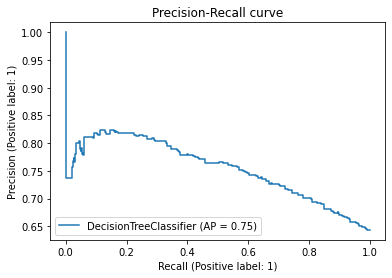

In [23]:
X_test = Test_Data_Final.loc[:,Output["Model_variables"]]
Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]

disp = plot_precision_recall_curve(Output["Classifier"], X_test, Y_test)
disp.ax_.set_title('Precision-Recall curve')

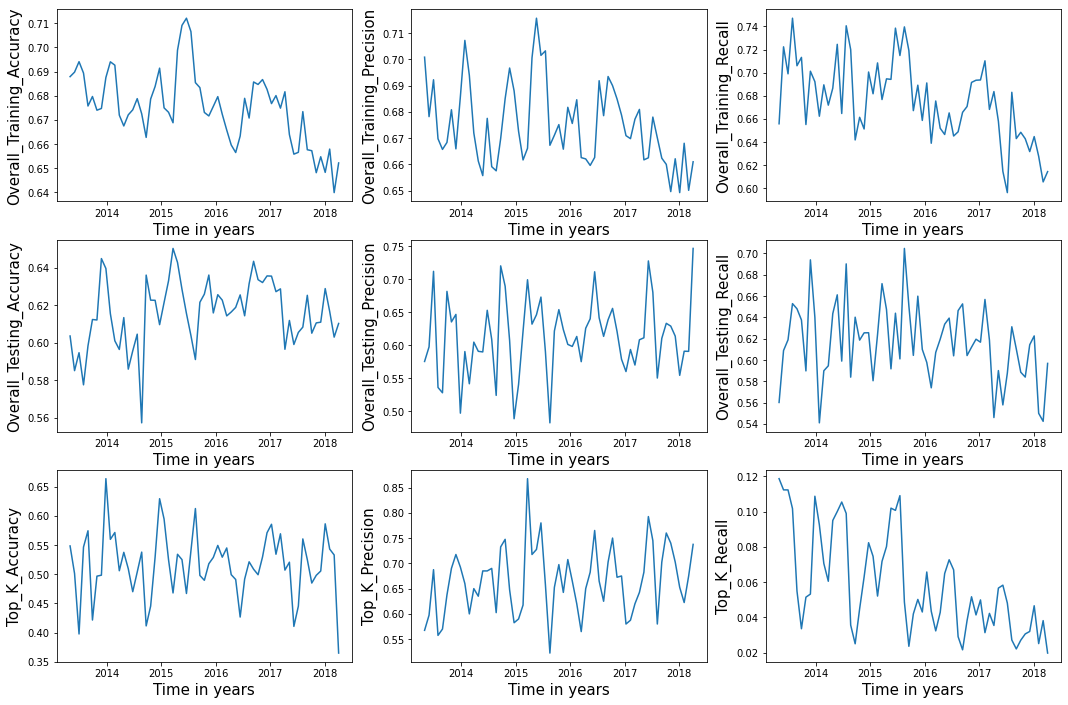

In [24]:
n_cols=3
n_rows=3
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))

ax = axs[0][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Accuracy",fontsize=15);

ax = axs[0][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Precision",fontsize=15);

ax = axs[0][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Recall",fontsize=15);

ax = axs[1][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Accuracy",fontsize=15);

ax = axs[1][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Precision",fontsize=15);

ax = axs[1][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Recall",fontsize=15);

ax = axs[2][0]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Accuracy",fontsize=15);

ax = axs[2][1]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Precision",fontsize=15);

ax = axs[2][2]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Recall",fontsize=15);

In [25]:
Output["Model_variables"]

['Project Cost',
 'Number of dates since posted',
 'School Percentage Free Lunch',
 'Project Cost',
 'Project Short Description_polarity',
 'Project Short Description_subjectivity',
 'Project Essay_polarity',
 'Project Essay_subjectivity',
 'Project Need Statement_polarity',
 'Project Need Statement_subjectivity',
 'School Metro Type_rural',
 'School Metro Type_town',
 'School Metro Type_unknown',
 'School Metro Type_urban',
 'Teacher Prefix_Dr.',
 'Teacher Prefix_Mrs.',
 'Teacher Prefix_Ms.',
 'Teacher Prefix_Mx.',
 'Teacher Prefix_Teacher',
 'Teacher Prefix_nan',
 'Project Grade Level Category_Grades 3-5',
 'Project Grade Level Category_Grades 9-12',
 'Project Grade Level Category_Grades PreK-2',
 'Project Grade Level Category_unknown']

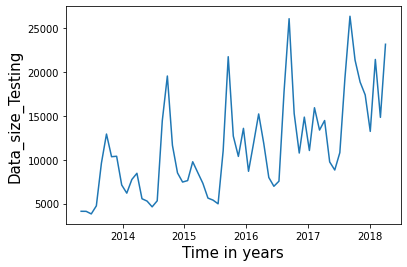

In [26]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))
ax = axs
sns.lineplot(data=Output, x="Time_points", y="Data_size_Testing",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Data_size_Testing",fontsize=15);

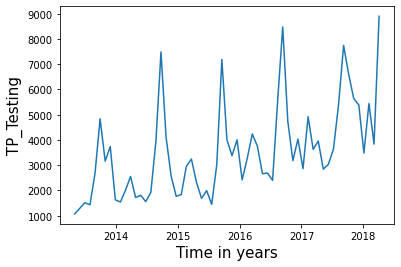

In [27]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))
ax = axs
sns.lineplot(data=Output, x="Time_points", y="TP_Testing",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("TP_Testing",fontsize=15);

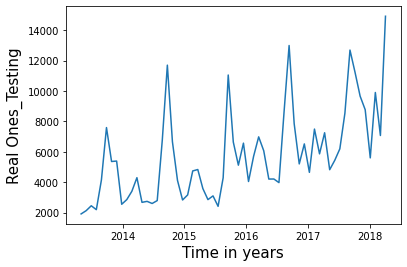

In [28]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))
ax = axs
sns.lineplot(data=Output, x="Time_points", y="Ones_Testing",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Real Ones_Testing",fontsize=15);

In [29]:
Test_Data_Final['Y_pred_prob'].notna

<bound method Series.notna of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
23175    0.0
23176    0.0
23177    0.0
23178    0.0
23179    0.0
Name: Y_pred_prob, Length: 23180, dtype: float64>

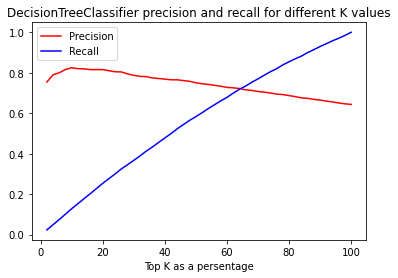

In [30]:
prT=[]
reT=[]
t=[]
k=2
Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
Test_Data_Final['Y_pred']=0
while (k<=100):
    Test_Data_Final.loc[Test_Data_Final.head(int(len(Test_Data_Final)*k/100)).index,'Y_pred'] = 1
    
    Y_test_k =  Test_Data_Final.loc[:,["Label"]] 
    Y_pred_k =  Test_Data_Final.loc[:,["Y_pred"]] 

    cm= confusion_matrix(Y_test_k,Y_pred_k)
    if len(cm.ravel())==4:TN, FP ,FN, TP =  cm.ravel()
    else: TN, FP ,FN, TP=0,0,0,100
    t+=[k]
#     print(len(Y_test_k[Y_test_k["Label"]==1])/len(Tk))
    preci=TP/(TP+FP)
    prT+=[preci]
    rec=TP/(TP+FN)
    reT+=[rec]
    k+=2
ax1=plt.plot(t,prT, 'r',label='Precision')
ax2=plt.plot(t,reT, 'b',label='Recall')
plt.xlabel("Top K as a persentage")

plt.title(Output["Classifier"].__class__.__name__+" precision and recall for different K values")
plt.legend()
plt.show()

In [31]:
import lime
import lime.lime_tabular

X_train = Train_Data_Final.loc[:,Output["Model_variables"]]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=Output["Model_variables"], 
                    class_names=['Label'], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

Intercept 0.16551865167021473
Prediction_local [0.33235184]
Right: 0


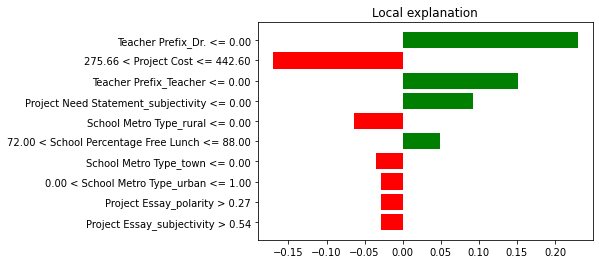

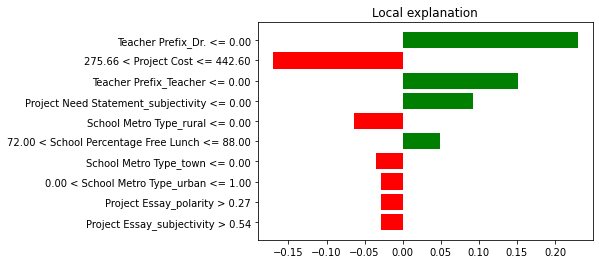

In [32]:
exp = explainer.explain_instance(X_test.iloc[-1], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [33]:
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.3554606213252249
Prediction_local [0.50784908]
Right: 1


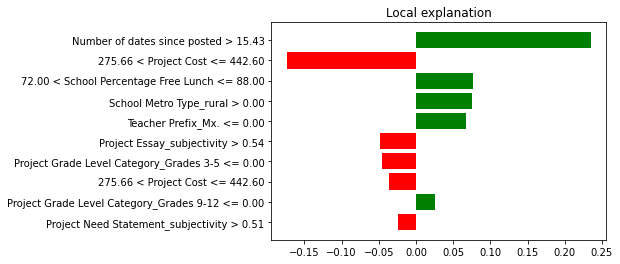

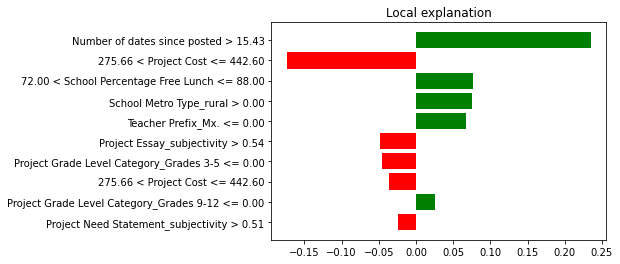

In [34]:
exp = explainer.explain_instance(X_test.iloc[0], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [35]:
exp.show_in_notebook(show_table=True, show_all=False)

In [36]:
X_test

Project Cost  Number of dates since posted  \
0            441.29                     22.525081   
1           4979.25                      4.674387   
2            785.67                      0.409734   
3            417.00                      1.850660   
4           1462.15                      2.516262   
...             ...                           ...   
23175        178.55                      9.388727   
23176        559.74                      5.051620   
23177        842.52                      0.844931   
23178       1257.66                      2.819792   
23179        306.59                      0.288438   

       School Percentage Free Lunch  Project Cost  \
0                              80.0        441.29   
1                              61.0       4979.25   
2                              95.0        785.67   
3                              56.0        417.00   
4                               8.0       1462.15   
...                             ...           ...   
23175                          33.0        178.55   
23176                          47.0        559.74   
23177                          36.0        842.52   
23178                          13.0       1257.66   
23179                          75.0        306.59   

       Project Short Description_polarity  \
0                                0.476190   
1                                0.300000   
2                                0.143750   
3                                0.335119   
4                                0.233333   
...                                   ...   
23175                            0.400000   
23176                            0.186667   
23177                            0.201389   
23178                            0.550000   
23179                            0.361905   

       Project Short Description_subjectivity  Project Essay_polarity  \
0                                    0.528571                0.351648   
1                                    0.583333                0.368561   
2                                    0.262500                0.205094   
3                                    0.847024                0.088790   
4                                    0.433333                0.329800   
...                                       ...                     ...   
23175                                0.800000                0.119859   
23176                                0.780000                0.256883   
23177                                0.506944                0.265774   
23178                                0.600000                0.156348   
23179                                0.502381                0.318070   

       Project Essay_subjectivity  Project Need Statement_polarity  \
0                        0.544689                         0.750000   
1                        0.538326                         0.500000   
2                        0.393130                         0.000000   
3                        0.574008                         0.000000   
4                        0.519667                         0.000000   
...                           ...                              ...   
23175                    0.494805                         0.000000   
23176                    0.641872                         0.000000   
23177                    0.561607                         0.291667   
23178                    0.386633                        -0.250000   
23179                    0.581109                         0.000000   

       Project Need Statement_subjectivity  ...  Teacher Prefix_Dr.  \
0                                 0.950000  ...                   0   
1                                 0.500000  ...                   0   
2                                 0.000000  ...                   0   
3                                 0.000000  ...                   0   
4                                 0.500000  ...                   0   
...                                    ...  ... 

In [37]:
X_test.iloc[:100]

Project Cost  Number of dates since posted  School Percentage Free Lunch  \
0         441.29                     22.525081                          80.0   
1        4979.25                      4.674387                          61.0   
2         785.67                      0.409734                          95.0   
3         417.00                      1.850660                          56.0   
4        1462.15                      2.516262                           8.0   
..           ...                           ...                           ...   
95      18782.89                      7.562755                          95.0   
96       1498.75                     28.376597                          65.0   
97        957.08                      2.697002                          95.0   
98        729.39                      0.945394                          95.0   
99        617.28                     16.510579                          63.0   

    Project Cost  Project Short Description_polarity  \
0         441.29                            0.476190   
1        4979.25                            0.300000   
2         785.67                            0.143750   
3         417.00                            0.335119   
4        1462.15                            0.233333   
..           ...                                 ...   
95      18782.89                            0.364286   
96       1498.75                            0.462500   
97        957.08                           -0.093750   
98        729.39                            0.291667   
99        617.28                            0.000000   

    Project Short Description_subjectivity  Project Essay_polarity  \
0                                 0.528571                0.351648   
1                                 0.583333                0.368561   
2                                 0.262500                0.205094   
3                                 0.847024                0.088790   
4                                 0.433333                0.329800   
..                                     ...                     ...   
95                                0.446429                0.197816   
96                                0.708333                0.294051   
97                                0.333333                0.143093   
98                                0.750000                0.196343   
99                                0.000000                0.280372   

    Project Essay_subjectivity  Project Need Statement_polarity  \
0                     0.544689                             0.75   
1                     0.538326                             0.50   
2                     0.393130                             0.00   
3                     0.574008                             0.00   
4                     0.519667                             0.00   
..                         ...                              ...   
95                    0.366474                             0.16   
96                    0.532620                             0.00   
97                    0.413012                             0.75   
98                    0.515470                             0.00   
99                    0.455165                             0.00   

    Project Need Statement_subjectivity  ...  Teacher Prefix_Dr.  \
0                                  0.95  ...                   0   
1                                  0.50  ...                   0   
2                                  0.00  ...                   0   
3                                  0.00  ...                   0   
4                                  0.50  ...                   0   
..                                  ...  ...                 ...   
95                                 0.54  ...                   0   
96                                 0.50  ...                   0   
97                                 1.00  ...                   0   
98                                 0.00  ...

In [40]:
import shap
shap.initjs()

In [41]:
explainer = shap.TreeExplainer(Output["Classifier"])
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple